# Data cleaning

In [8]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')
print(df.head())
print("Missing Values:")
print(df.isnull().sum())  
df.dropna(inplace=True)
df.fillna(0, inplace=True)
print("Duplicate Rows:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Data Types:")
print(df.dtypes)  
df.to_csv('cleaned_file.csv', index=False)
print(df)

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
Missing Values:
product_na

# Data Exploration

In [2]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [3]:
df.shape

(154467, 6)

In [4]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,154467,154467,154467,154467,154467,154467
unique,841,479,8,1324,85306,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,4362,6859,88726,7623,6784,122808


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154467 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154467 non-null  object
 1   product_price  154467 non-null  object
 2   Rate           154467 non-null  object
 3   Review         154467 non-null  object
 4   Summary        154467 non-null  object
 5   Sentiment      154467 non-null  object
dtypes: object(6)
memory usage: 8.2+ MB


# Null Values

In [6]:
df.isnull().any()

product_name     False
product_price    False
Rate             False
Review           False
Summary          False
Sentiment        False
dtype: bool

# Duplicate

In [9]:
df[df.duplicated()]

,product_name,product_price,Rate,Review,Summary,Sentiment


# Test and Train data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')
X = data.drop(columns=['Sentiment']) 
y = data['Sentiment'] 

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("\nFirst few rows of the training set:")
print(X_train.head())
print(y_train.head())
print("\nFirst few rows of the testing set:")
print(X_test.head())
print(y_test.head())

Training set shape:
X_train: (164041, 5)
y_train: (164041,)

Testing set shape:
X_test: (41011, 5)
y_test: (41011,)

First few rows of the training set:
                                             product_name product_price Rate  \
165013  Arpita Crafts Wooden 2 Pocket Pen Stand Om Swa...           159    5   
82939   Dettol Effective Protection Antiseptic LiquidÐ...           349    5   
26246   Wishpool Cut Resistant Gloves - High Performan...           227    2   
94043   Mi 18W Quick Charger for Mi,Redmi,Xiomi device...           499    5   
69954   Urban Terrain Berlin with Complete Accessories...          6949    4   

                       Review  \
165013              wonderful   
82939               wonderful   
26246   slightly disappointed   
94043   mind-blowing purchase   
69954            nice product   

                                                  Summary  
165013                                       good product  
82939                                     aweso

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 1. SVM

Accuracy: 0.9133821165253063
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.81      4735
     neutral       0.00      0.00      0.00      1761
    positive       0.92      0.99      0.95     29582

    accuracy                           0.91     36078
   macro avg       0.59      0.59      0.59     36078
weighted avg       0.87      0.91      0.89     36078



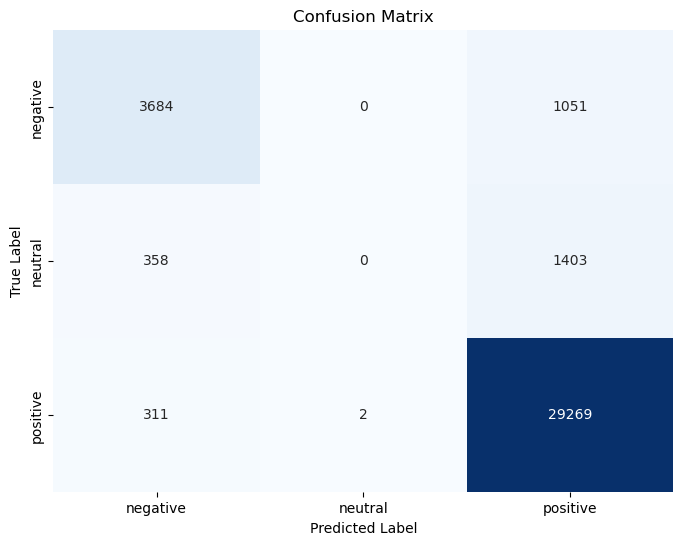

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset
X = data['Review'] 
y = data['Sentiment'] 

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vect, y_train)
y_pred = svm_classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)

# Printing accuracy
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report with support

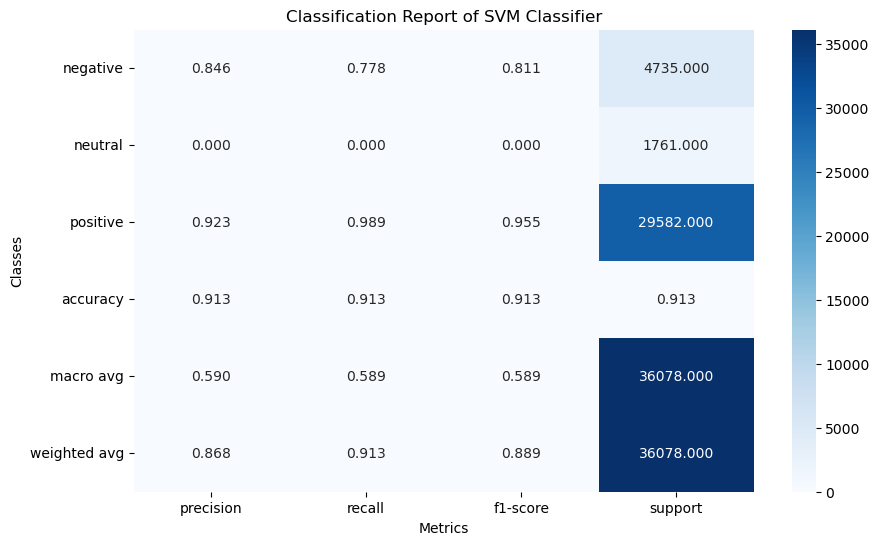

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset 
X = data['Review']  
y = data['Sentiment']  

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vect, y_train)
y_pred = svm_classifier.predict(X_test_vect)

# Generating classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# plotting the precision, recall, f1-score, and support
plt.figure(figsize=(10, 6))
sns.heatmap(df_class_report[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report of SVM Classifier')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


# ROC for SVM

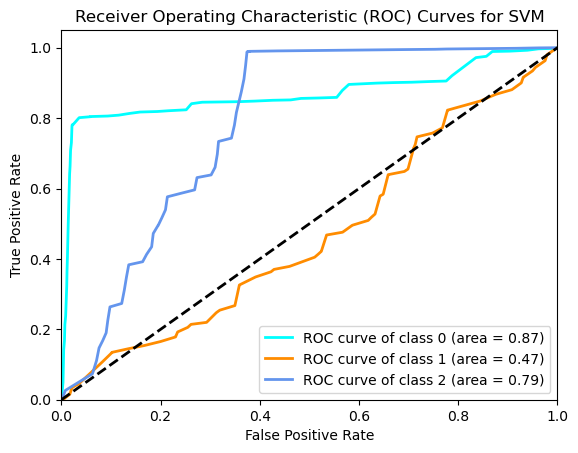

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping the rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

data['Sentiment'] = data['Sentiment'].astype('category').cat.codes

# Splitting the dataset 
X = data['Review'] 
y = data['Sentiment']  

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]


svm_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_classifier.fit(X_train_vect, y_train_bin)

y_score = svm_classifier.predict_proba(X_test_vect)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for SVM')
plt.legend(loc="lower right")
plt.show()


# 2. Naive Bayes Classifier

Accuracy: 0.9046787515937691
Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      4735
     neutral       0.20      0.06      0.09      1761
    positive       0.92      0.98      0.95     29582

    accuracy                           0.90     36078
   macro avg       0.66      0.60      0.61     36078
weighted avg       0.88      0.90      0.89     36078



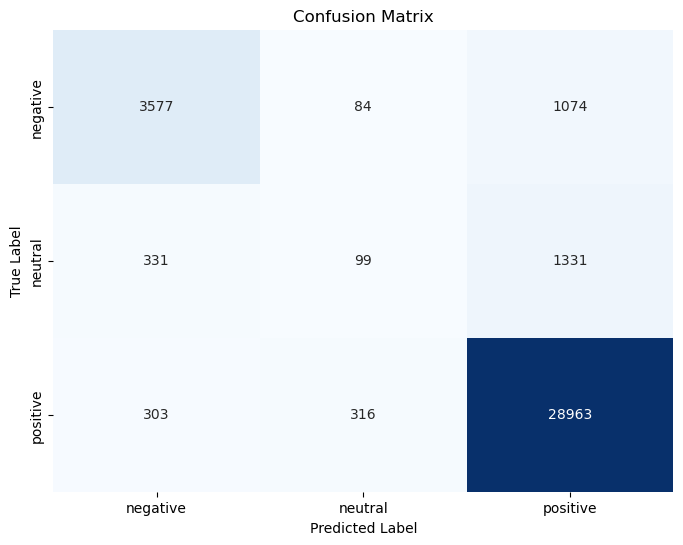

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset
X = data['Review']  
y = data['Sentiment']  

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vectorizing the text data using TF-IDF
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)
y_pred = nb_classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)

# Printing accuracy
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# classification report for NBC with support

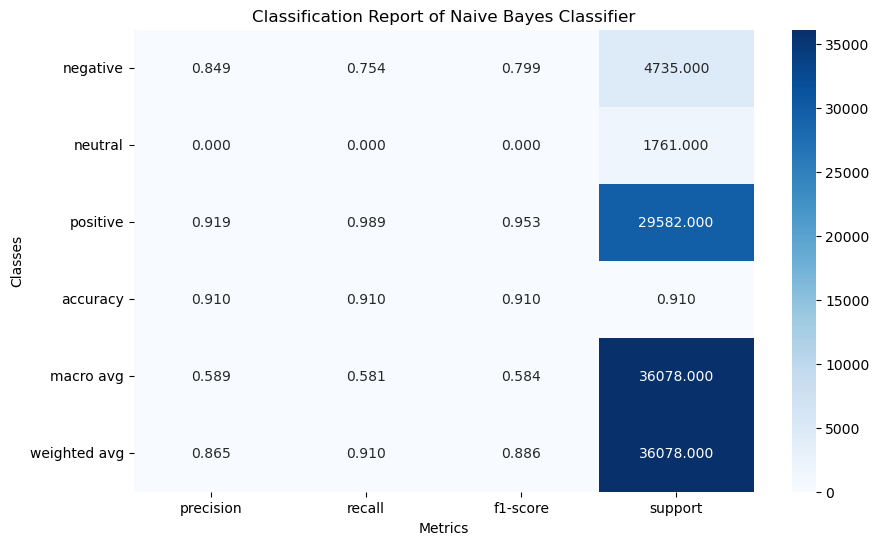

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping the rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset 
X = data['Review'] 
y = data['Sentiment']  

# Split the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)


y_pred = nb_classifier.predict(X_test_vect)

# Generating classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# Plotting precision, recall, f1-score, and support
plt.figure(figsize=(10, 6))
sns.heatmap(df_class_report[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report of Naive Bayes Classifier')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


# ROC for NBC

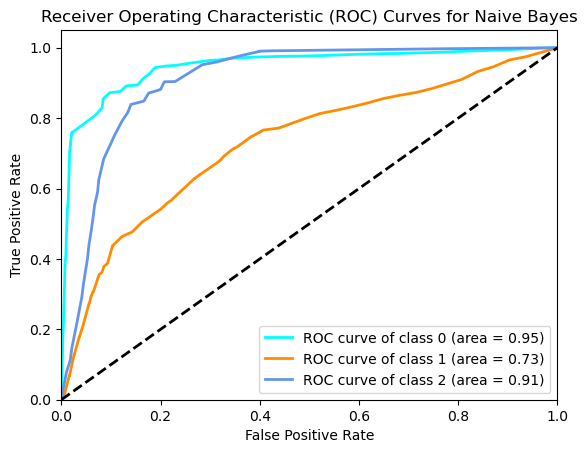

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)


data['Sentiment'] = data['Sentiment'].astype('category').cat.codes

# Splitting the dataset 
X = data['Review'] 
y = data['Sentiment']  

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

nb_classifier = OneVsRestClassifier(MultinomialNB())
nb_classifier.fit(X_train_vect, y_train_bin)

y_score = nb_classifier.predict_proba(X_test_vect)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# 3. Logistic regression

Accuracy: 0.9134929874161539
Classification Report:


/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

              precision    recall  f1-score   support

    negative       0.85      0.78      0.81      4735
     neutral       0.00      0.00      0.00      1761
    positive       0.92      0.99      0.95     29582

    accuracy                           0.91     36078
   macro avg       0.59      0.59      0.59     36078
weighted avg       0.87      0.91      0.89     36078



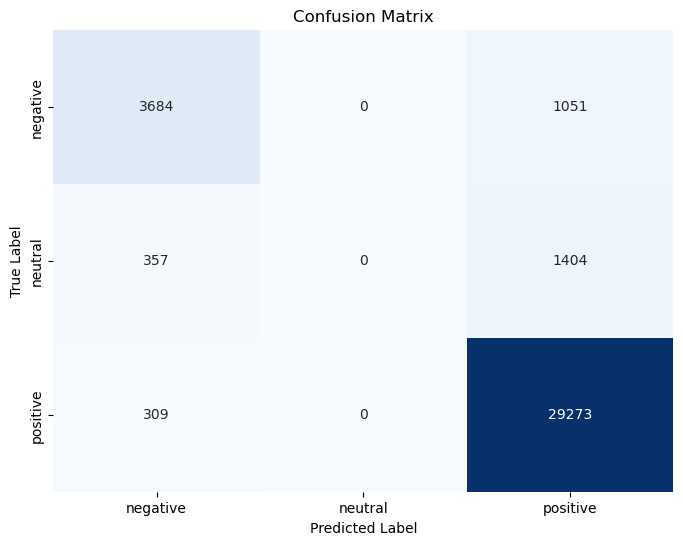

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset
X = data['Review'] 
y = data['Sentiment'] 

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()

# Vectorize the text data using TF-IDF
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_vect, y_train)
y_pred = lr_classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)

# Printing accuracy
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# classification report for Logistic regression with support

/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ananyasmaranikadivendi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

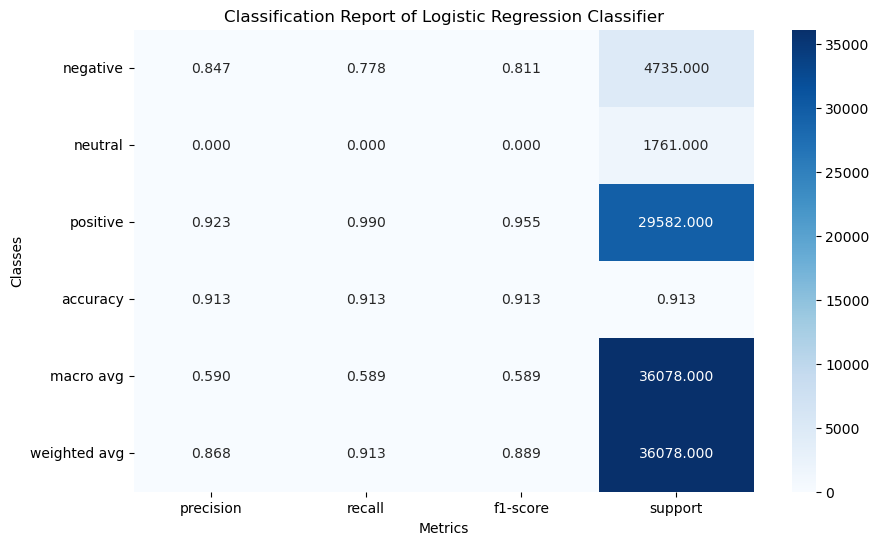

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping the rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

# Splitting the dataset 
X = data['Review']  
y = data['Sentiment']  

# Split the data into (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_vect, y_train)


y_pred = lr_classifier.predict(X_test_vect)

class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# Plotting precision, recall, f1-score, and support
plt.figure(figsize=(10, 6))
sns.heatmap(df_class_report[['precision', 'recall', 'f1-score', 'support']], annot=True, cmap='Blues', fmt=".3f")
plt.title('Classification Report of Logistic Regression Classifier')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# ROC for Logistic regression

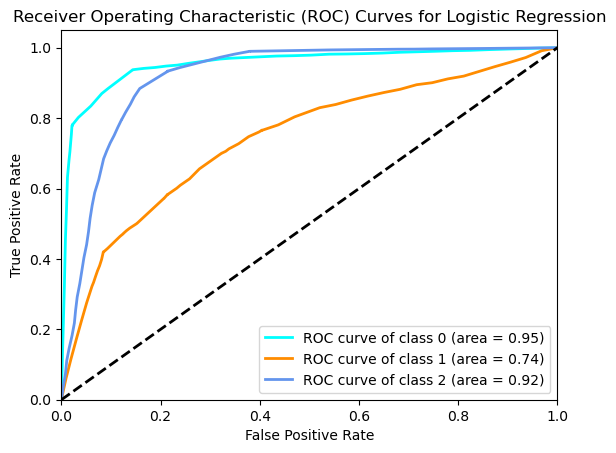

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from itertools import cycle

# Loading the dataset
data = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/Dataset-SA.csv')

# Dropping rows 
data.dropna(subset=['Review', 'Sentiment'], inplace=True)

data['Sentiment'] = data['Sentiment'].astype('category').cat.codes

# Splitting the dataset 
X = data['Review']  
y = data['Sentiment'] 

# Splitting the data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_train_bin.shape[1]

logreg_classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
logreg_classifier.fit(X_train_vect, y_train_bin)

y_score = logreg_classifier.predict_proba(X_test_vect)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


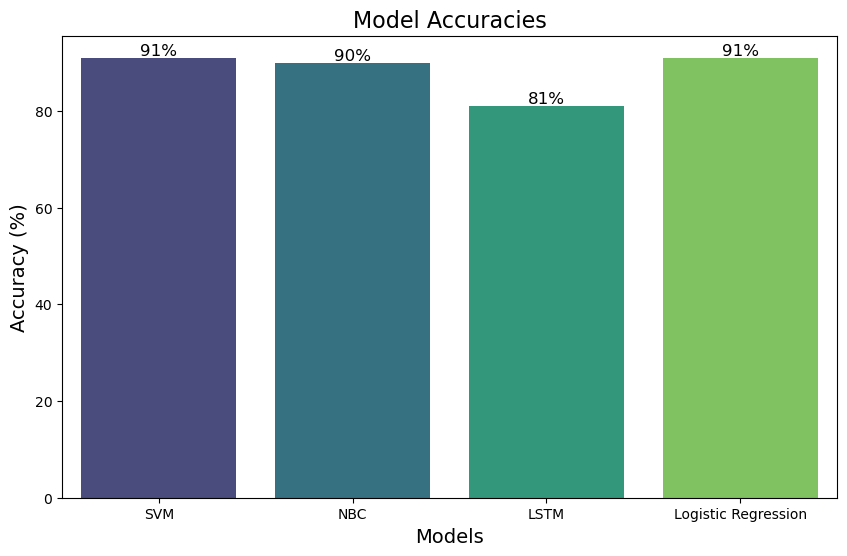

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model accuracies
model_accuracies = {
    'SVM': 91,
    'NBC': 90,
    'LSTM': 81,
    'Logistic Regression': 91
}

models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Setting the plot size
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(x=models, y=accuracies, palette='viridis')

plt.title('Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

for index, value in enumerate(accuracies):
    plt.text(index, value + 0.5, f'{value}%', ha='center', fontsize=12)

# Displaying the plot
plt.show()
